In [96]:
from qiskit import *
from qiskit.visualization import plot_histogram

[['0', '0', '0', '1'], ['1', '0', '1', '1'], ['1', '1', '1', '0'], ['1', '1', '1', '1']]


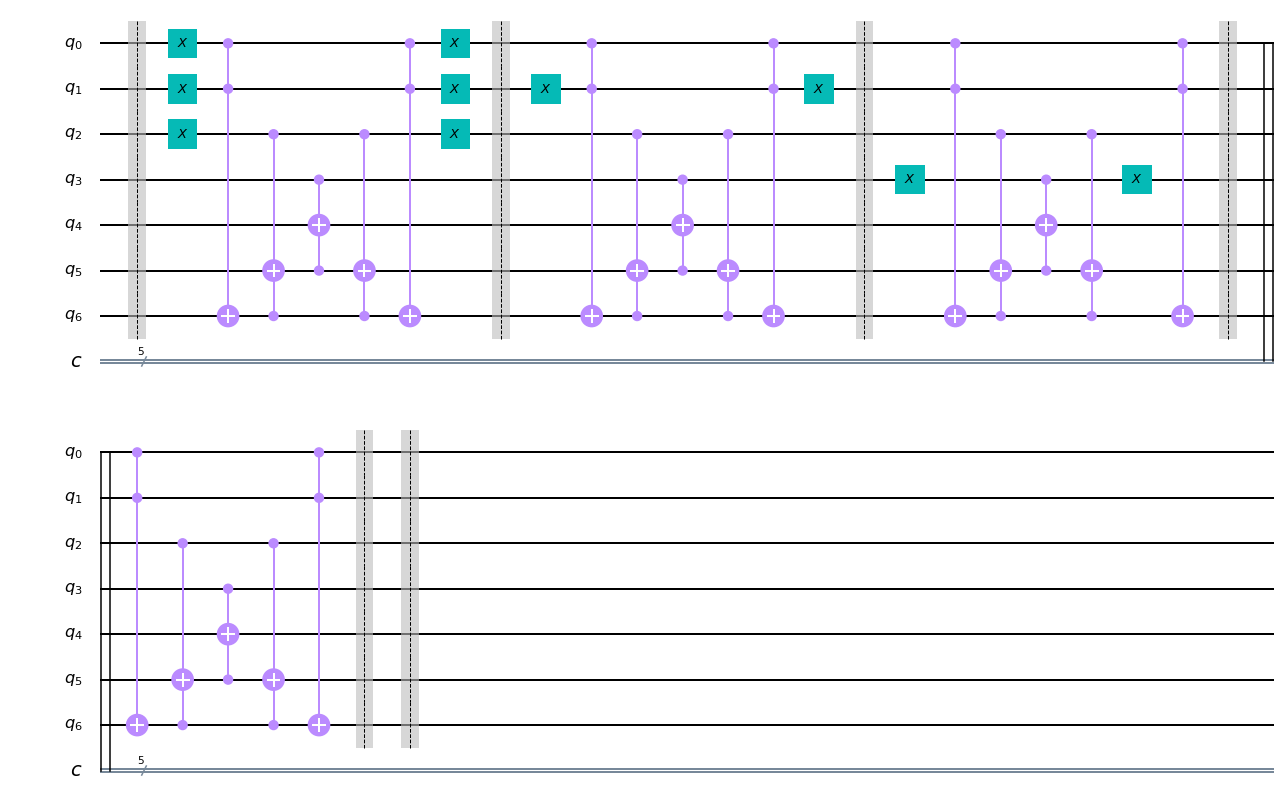

In [156]:
#ship_coords = (10, 14, 15, 0, 1, 8, 9) # Imagina un mapa como este:
ship_coords = (1, 11, 14, 15)
binary_coords = []

#  0    1    2    3  
#  4    5    6    7
#  8    9    10   11
#  12   13   14   15


for i in range(len(ship_coords)):
    binary_coords.append(list(format(ship_coords[i], '04b')))

print(binary_coords)

game_operator = QuantumCircuit(7, 5)
game_operator.barrier(range(7))

for coord in binary_coords:
    
    for j, i in enumerate(coord):
        if i == '0':
            game_operator.x(j)
            
    game_operator.ccx(0,1,6)
    game_operator.ccx(2,6,5)
    game_operator.ccx(3,5,4)
    game_operator.ccx(2,6,5)
    game_operator.ccx(0,1,6)
    
    for j, i in enumerate(coord):
        if i == '0':
            game_operator.x(j)
    game_operator.barrier(range(7))
            
game_operator.barrier(range(7))


"""   game_operator haría lo siguiente:

       _____
|x>---|     |---|x>
      |  G  |
|0>---|_____|---|G(x)>


siendo:  | G(x) = 0 si es agua
         | G(x) = 1 si es tocado


"""

game_operator.draw(output = 'mpl')

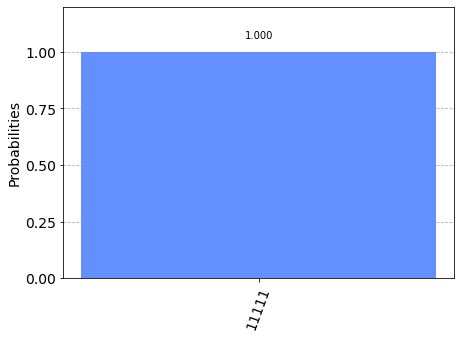

In [139]:
quest_operator = QuantumCircuit(7, 5)

guess = 15
binary_guess = bin(guess)[2:]

i = 0
for qubit in binary_guess[::-1]:
    if (qubit == '1'): 
        quest_operator.x(i)
    i += 1

circ = quest_operator + game_operator

circ.measure(range(5), range(5))
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1)
result = job.result()
counts = result.get_counts(circ)

"""

En este caso, hemos metido el 1111 que equivale a la posición 15
Por tanto la salida (el qubit de abajo del todo) es un uno, tocado.

"""

plot_histogram(counts)

'\n\nEn este caso, hemos metido el 1111 que equivale a la posición 15\nPor tanto la salida (el qubit de abajo del todo) es un uno.\n\n'

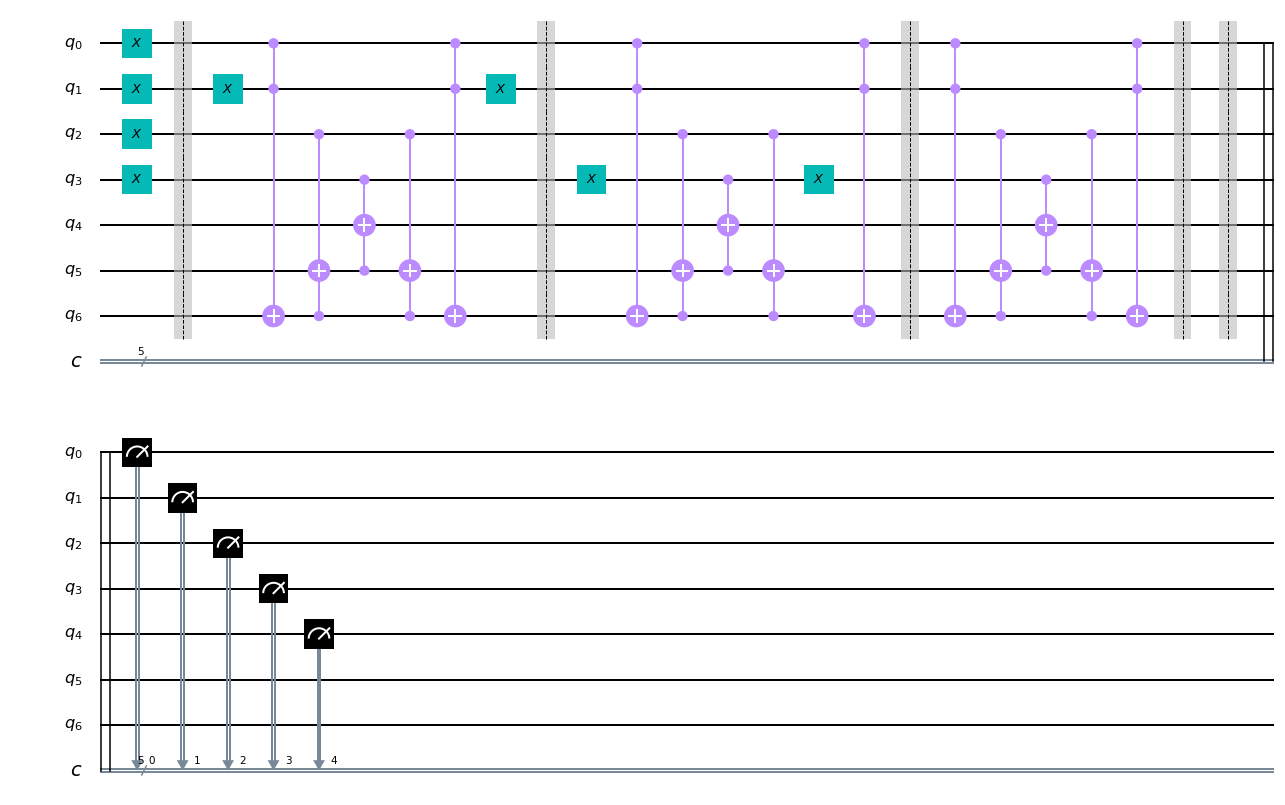

In [140]:
circ.draw('mpl')

In [155]:
ship_coords = (1, 11, 14, 15)
binary_coords = []

for i in range(len(ship_coords)):
    binary_coords.append(list(format(ship_coords[i], '04b')))

print(binary_coords)

[['0', '0', '0', '1'], ['1', '0', '1', '1'], ['1', '1', '1', '0'], ['1', '1', '1', '1']]
